In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import seaborn as sns

In [81]:
Auto = load_data('Auto')

In [82]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


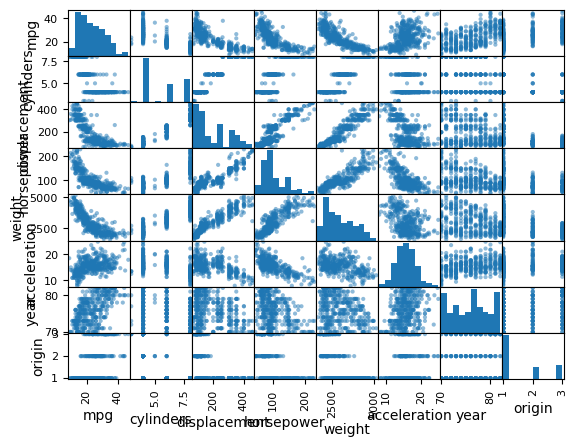

In [83]:
pd.plotting.scatter_matrix(Auto);

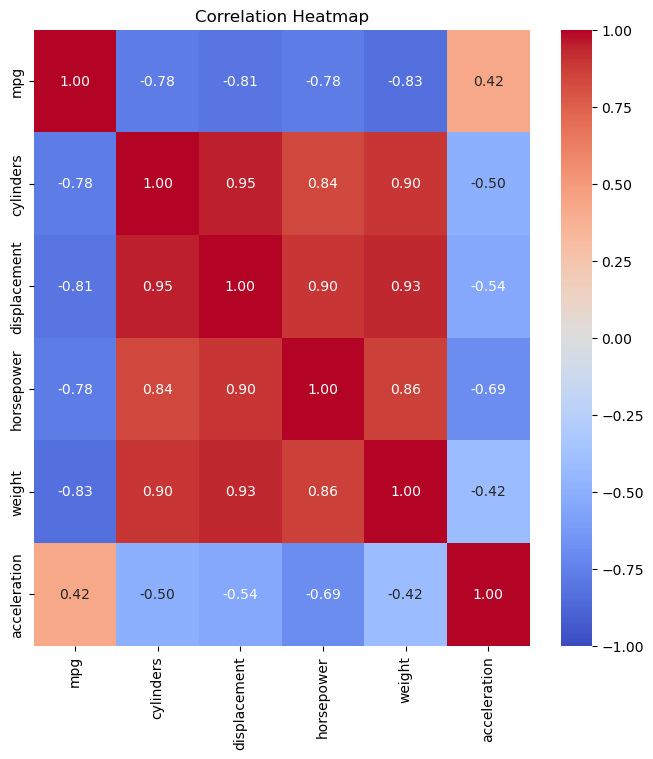

In [84]:
plt.figure(figsize=(8, 8))
numeric_df = Auto[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]

sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1,
    vmax=1
)

plt.title('Correlation Heatmap')
plt.show()

In [85]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [86]:
# Auto.cylinders = pd.Series(Auto.cylinders, dtype = 'category')
Auto.origin = pd.Series(Auto.origin, dtype = 'category')

In [87]:
allvars = list(Auto.columns.drop(['mpg']))
y = Auto['mpg']
final = allvars
X = MS(final).fit_transform(Auto)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Tue, 03 Feb 2026   Prob (F-statistic):          1.79e-139
Time:                        13:58:51   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.9546      4.677     -3.839      0.000     -27.150      -8.759
cylinders       -0.4897      0.321     -1.524      0.128      -1.121       0.142
displacement     0.0240      0.008      3.133      0.002       0.009       0.039
horsepower      -0.0182      0.014     -1.326      0.185      -0.045       0.009
weight          -0.0067      0.001    -10.243      0.000      -0.008      -0.005
acceleration     0.0791      0.098      0.805      0.421      -0.114       0.272
year             0.7770      0.052     15.005      0.000       0.675       0.879
origin[2]        2.6300      0.566      4.643      0.000       1.516       3.744
origin[3]        2.8532      0.553      5.162      0.000       1.766       3.940
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.452
Skew:                           0.444   Prob(JB):                     3.30e-08
Kurtosis:                       4.150   Cond. No.                     8.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
"""
cylinders, horsepower, acceleration include 0 in their 95% confidence interval. 
p value is also higher, hence they are not statistically significant
this could be due to multicollinearity. as in common sense, several parameters of vehicle / engine are correlated
"""

'\ncylinders, horsepower, acceleration include 0 in their 95% confidence interval. \np value is also higher, hence they are not statistically significant\nthis could be due to multicollinearity. as in common sense, several parameters of vehicle / engine are correlated\n'

In [89]:
# TBD - check what the condition number is

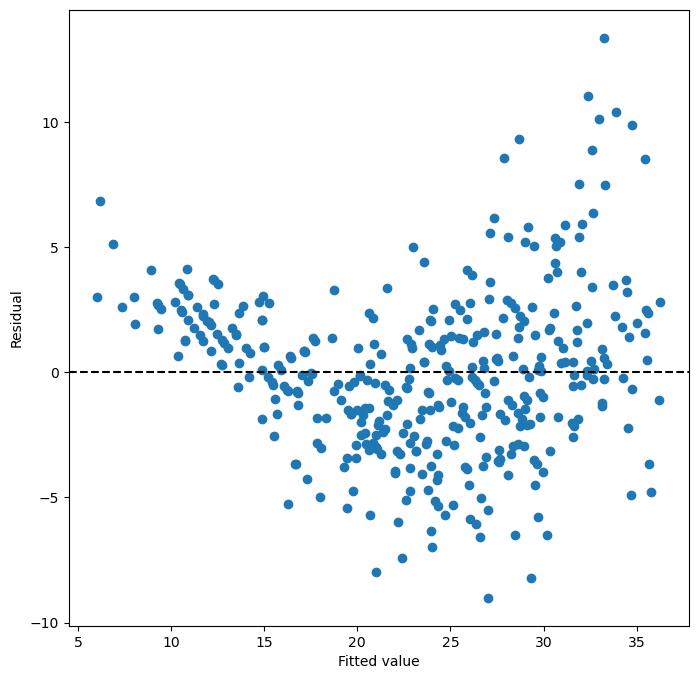

In [90]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

In [91]:
"""
u shape pattern is visible. the relationship is non linear. simple linear regression is not a good approach
"""

'\nu shape pattern is visible. the relationship is non linear. simple linear regression is not a good approach\n'

In [92]:
anova_lm(results)

AttributeError: 'PandasData' object has no attribute 'design_info'

In [ ]:
"""
from statsmodel documentaion, "Model statistics are given in the order of args. Models must have been fit using the formula api."

design_info is metadata about how the design matrix was built:
which variables were used
how categorical variables were dummy-coded
what interactions / transformations were applied

Patsy is the library that:
reads formulas like y ~ x + C(z)
creates the design matrix
stores the blueprint in design_info


sm.OLS(y, X).fit()
# or
ModelSpec(...).fit_transform(...)
creates a PandasData. It does not have design_info

when we do
model = smf.ols("mpg ~ weight + horsepower + C(origin)", data=Auto).fit()
then 
model.model.data → PatsyData
model.model.data.design_info → EXISTS

"""

In [ ]:
formula = "mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin)"
model = smf.ols(formula, data=Auto)
result_formula_api = model.fit()
result_formula_api.summary()

In [ ]:
"""
weight, year and origin are statistically significant.
an year increase would result in 0.7 increase in mpg. recently produced cars are more efficient
"""

In [ ]:
anova_lm(result_formula_api)

In [ ]:
"""
Null Hypothesis is proved false, as there is atleast one coefficient that is nonzero.
Acceleation has very less F statistic.
"""

In [ ]:
# residual plot
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

In [ ]:
"""
there is non linearity in the relationship bw predictors and the mpg
"""

In [ ]:
# Computes influence diagnostics for each observation in your fitted OLS model
infl = results.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
# identifies index of largest element of an array
highest_influence_observation = np.argmax(infl.hat_matrix_diag)

In [ ]:
"""
there is a high inflation observation
TBD - check how to detect whether this observation can be considered or omitted
Cook's distance measures the influence of individual data points on predicted values or parameter estimates, 
identifying potential outliers or high-leverage points
"""

In [ ]:
# i will combine cylinder and displacement as interaction term
X = MS(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
        ('cylinders', 'displacement')]).fit_transform(Auto)
model2 = sm.OLS(y, X)
result_interaction_term = model2.fit()
result_interaction_term.summary()

In [ ]:
"""
the condition number has reduced. 
but the model's R square did not improve with this interaction compared to the plain multiple regression model
"""

In [ ]:
# i will combine cylinder and displacement as interaction term
X = MS(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
        ('cylinders', 'horsepower'),('displacement','weight')]).fit_transform(Auto)
model3 = sm.OLS(y, X)
result_interaction_term_2 = model3.fit()
result_interaction_term_2.summary()

In [ ]:
# residual plot
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(result_interaction_term_2.fittedvalues, result_interaction_term_2.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

In [ ]:
# i will combine cylinder and displacement as interaction term
X = MS(['cylinders', 'displacement', 'horsepower', 'weight','year',
        ('cylinders', 'horsepower'),('displacement','weight')]).fit_transform(Auto)
model4 = sm.OLS(y, X)
result_interaction_term_3 = model4.fit()
result_interaction_term_3.summary()

In [ ]:
# residual plot
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(result_interaction_term_3.fittedvalues, result_interaction_term_3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

In [ ]:
"""
cylinders:horsepower & displacement:weight seem to increase the R square score.
But also there is increase in the condition number
the residual plot has funnel pattern indicating heteroscedasticity
i.e the model's error variance is not constant, typically increasing (or decreasing) as the predicted value changes
"""

In [ ]:
# transformations

reg_with_log_transformation = smf.ols('mpg ~ horsepower + np.log(horsepower) + weight + year + origin', Auto)
reg_with_log_transformation_result = reg_with_log_transformation.fit()

reg_with_transformation_root = smf.ols('mpg ~ horsepower + np.power(horsepower,0.5) + weight + year + origin', Auto)
reg_with_transformation_root_result = reg_with_transformation_root.fit()

reg_with_sqr_transformation = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + weight + year + origin', Auto)
reg_with_sqr_transformation_result = reg_with_sqr_transformation.fit()

In [ ]:
summarize(reg_with_log_transformation_result)

In [ ]:
summarize(reg_with_transformation_root_result)

In [ ]:
summarize(reg_with_sqr_transformation_result)

In [ ]:
def residual_plot(ax, results, title):
    #ax.set_title(title)
    #fig.fig.suptitle(title)
    ax.scatter(results.fittedvalues, results.resid)
    ax.set_xlabel("Fitted value")
    ax.set_ylabel("Residual")
    ax.axhline(0, color="k", linestyle="--")

fig, ax = plt.subplots(nrows = 3, figsize = (6,18))
residual_plot(ax[0], reg_with_log_transformation_result, "reg_with_log_transformation_result")
residual_plot(ax[1], reg_with_transformation_root_result, "reg_with_transformation_root_result")
residual_plot(ax[2], reg_with_sqr_transformation_result, "reg_with_sqr_transformation_result")


In [ ]:
"""
no improvement in residuals on different transformations
"""

In [ ]:
"""
When to apply which transformation

| Diagnostic plot / pattern                   | Problem               | Transformation to try                  |
| ------------------------------------------- | --------------------- | -------------------------------------- |
| Residuals vs Fitted shows **curve (U / ∩)** | Non-linearity         | Add (x^2, x^3) (polynomial), or log(x) |
| Residuals vs Fitted shows **fan / funnel**  | Non-constant variance | log(y), √y                             |
| Residuals vs Fitted variance ↑ with x       | Scale issue           | log(x)                                 |
| Q–Q plot shows **right-skewed tail**        | Non-normal errors     | log(y), √y                             |
| Histogram shows **right-skewed y**          | Skewed response       | log(y)                                 |
| Effect seems **multiplicative**             | Wrong functional form | log(y), log(x), log–log                |
| Large values dominate model                 | High leverage         | log(x), standardize                    |
| Relationship flattens at high x             | Diminishing returns   | log(x), polynomial                     |
| Step-like differences                       | Group effects         | Treat variable as categorical          |

"""